In [7]:
import pandas as pd
#Specify the file name
file_name="Ship_Performance_Dataset.csv"
#Load CSV file
df=pd.read_csv(file_name)
print(df.head())
print(df.tail())
#Get the shape
print(df.shape)
#Describe the numerical columns
print(df.describe())
#Display column headers with data types
print(df.columns)
print(df.dtypes)
df.to_csv("Ship_Performance_Dataset.csv",index=False)

         Date       Ship_Type    Route_Type           Engine_Type  \
0  2023-06-04  Container Ship           NaN  Heavy Fuel Oil (HFO)   
1  2023-06-11    Fish Carrier    Short-haul         Steam Turbine   
2  2023-06-18  Container Ship     Long-haul                Diesel   
3  2023-06-25    Bulk Carrier  Transoceanic         Steam Turbine   
4  2023-07-02    Fish Carrier  Transoceanic                Diesel   

  Maintenance_Status  Speed_Over_Ground_knots  Engine_Power_kW  \
0           Critical                12.597558      2062.983982   
1               Good                10.387580      1796.057415   
2               Fair                20.749747      1648.556685   
3               Fair                21.055102       915.261795   
4               Fair                13.742777      1089.721803   

   Distance_Traveled_nm  Draft_meters Weather_Condition  Cargo_Weight_tons  \
0           1030.943616     14.132284          Moderate        1959.017882   
1           1060.486382     14.6

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64


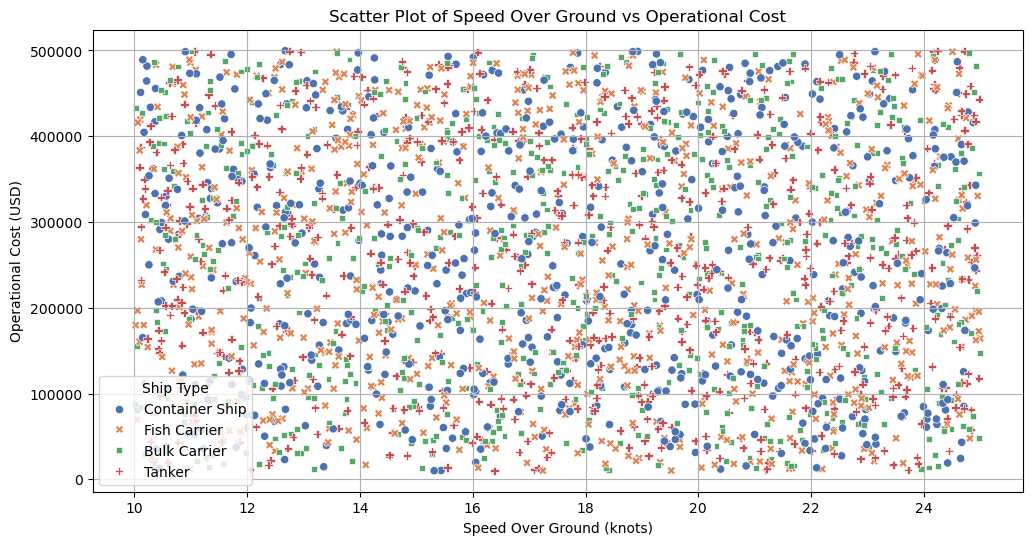

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Check for missing values
print(df.isnull().sum())  # Display the count of missing values in each column

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Speed_Over_Ground_knots', y='Operational_Cost_USD', hue='Ship_Type', style='Ship_Type', palette='deep')

plt.title('Scatter Plot of Speed Over Ground vs Operational Cost')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Operational Cost (USD)')
plt.legend(title='Ship Type')
plt.grid()
plt.show()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64


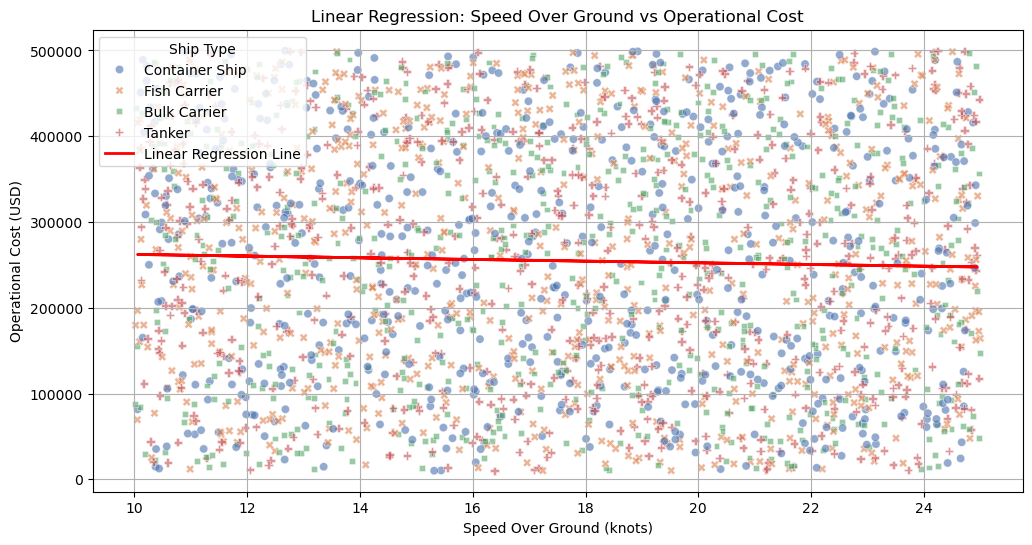

Intercept: 272049.68678653514
Slope: -978.4252333030871


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Check for missing values
print(df.isnull().sum())  # Display the count of missing values in each column

# Prepare the data
X = df[['Speed_Over_Ground_knots']]  # Independent variable
y = df['Operational_Cost_USD']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Speed_Over_Ground_knots', y='Operational_Cost_USD', hue='Ship_Type', style='Ship_Type', palette='deep', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')

plt.title('Linear Regression: Speed Over Ground vs Operational Cost')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Operational Cost (USD)')
plt.legend(title='Ship Type')
plt.grid()
plt.show()

# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')

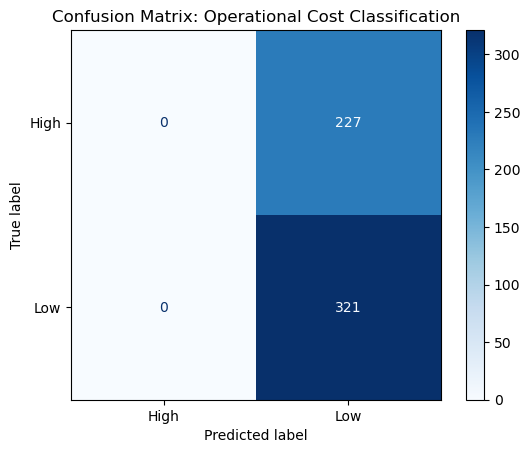

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       227
         Low       0.59      1.00      0.74       321

    accuracy                           0.59       548
   macro avg       0.29      0.50      0.37       548
weighted avg       0.34      0.59      0.43       548



C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Define a new categorical target variable based on operational cost
# For example: "Low" if cost < 300000, "High" otherwise
df['Cost_Category'] = np.where(df['Operational_Cost_USD'] < 300000, 'Low', 'High')

# Prepare the data
X = df[['Speed_Over_Ground_knots']]  # Independent variable
y = df['Cost_Category']  # Categorical dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plotting the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Operational Cost Classification')
plt.show()

# Print classification report for additional metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\l\anaconda3\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


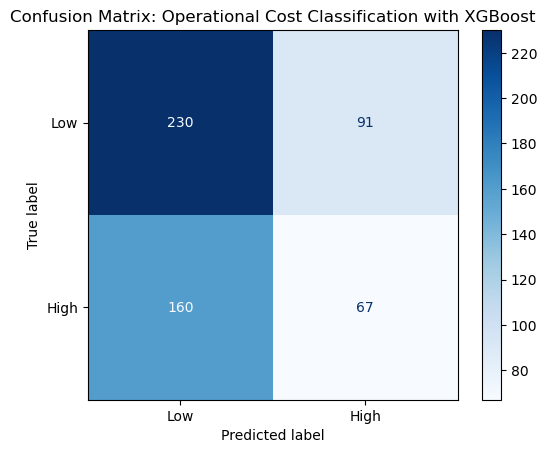

              precision    recall  f1-score   support

         Low       0.59      0.72      0.65       321
        High       0.42      0.30      0.35       227

    accuracy                           0.54       548
   macro avg       0.51      0.51      0.50       548
weighted avg       0.52      0.54      0.52       548



In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Define a new categorical target variable based on operational cost
# For example: "Low" if cost < 300000, "High" otherwise
df['Cost_Category'] = np.where(df['Operational_Cost_USD'] < 300000, 0, 1)  # 0 for 'Low', 1 for 'High'

# Prepare the data
X = df[['Speed_Over_Ground_knots']]  # Independent variable
y = df['Cost_Category']  # Categorical dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])

# Plotting the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Operational Cost Classification with XGBoost')
plt.show()

# Print classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

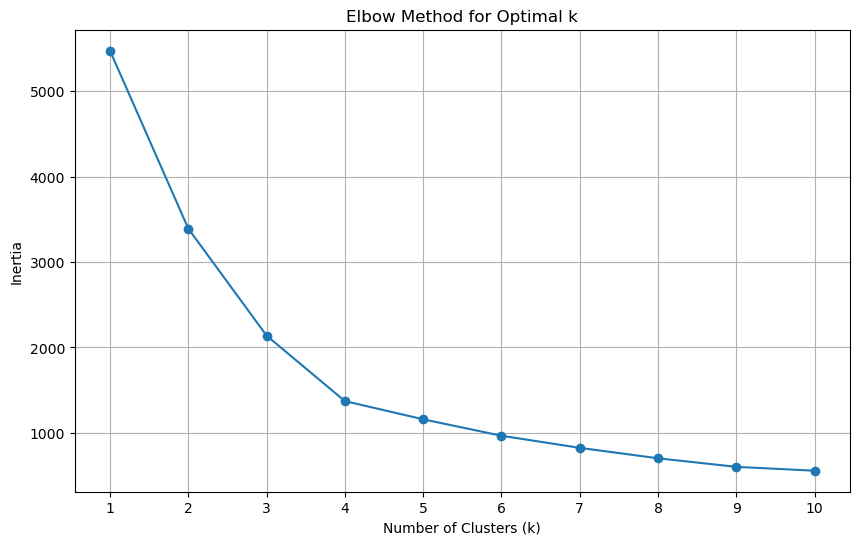

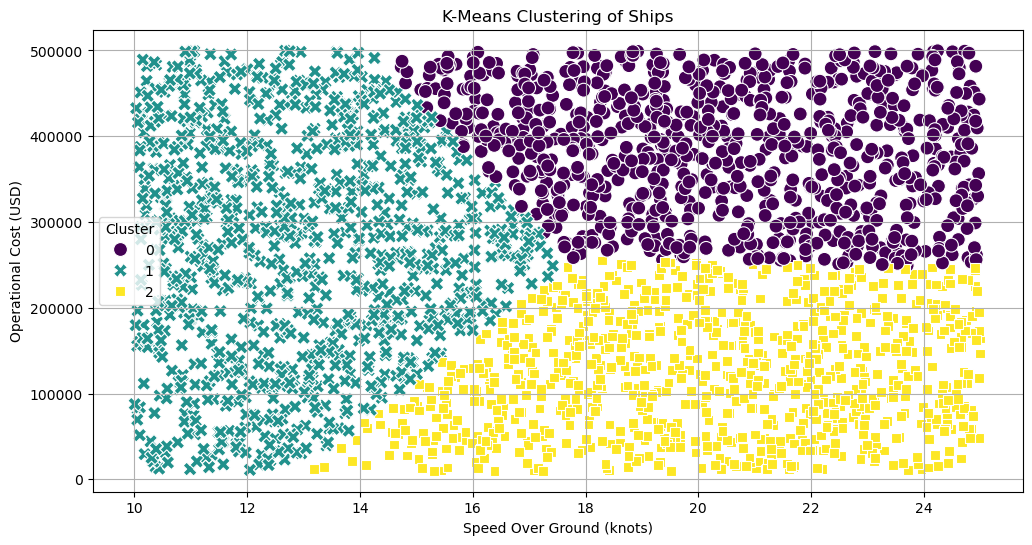

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Selecting features for clustering
X = df[['Speed_Over_Ground_knots', 'Operational_Cost_USD']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Choose the optimal number of clusters based on the elbow point
optimal_k = 3  # Adjust based on the elbow method plot

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Speed_Over_Ground_knots', y='Operational_Cost_USD', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('K-Means Clustering of Ships')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Operational Cost (USD)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

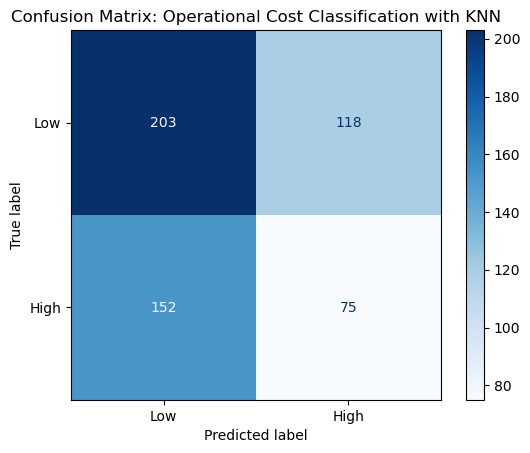

              precision    recall  f1-score   support

         Low       0.57      0.63      0.60       321
        High       0.39      0.33      0.36       227

    accuracy                           0.51       548
   macro avg       0.48      0.48      0.48       548
weighted avg       0.50      0.51      0.50       548



In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Define a new categorical target variable based on operational cost
df['Cost_Category'] = np.where(df['Operational_Cost_USD'] < 300000, 0, 1)  # 0 for 'Low', 1 for 'High'

# Prepare the data
X = df[['Speed_Over_Ground_knots']]  # Independent variable
y = df['Cost_Category']  # Categorical dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])

# Plotting the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Operational Cost Classification with KNN')
plt.show()

# Print classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))